# FDA HW3 Predict the stock movement


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

train_data = pd.read_csv('stock_train.csv')
train_data.head()


,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952


In [3]:
test_data = pd.read_csv('stock_test.csv')
test_data.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2018,2683.73,2695.81,2695.89,2682.36,1846463232
1,03-Jan-2018,2697.85,2713.06,2714.37,2697.77,2090595328
2,04-Jan-2018,2719.31,2723.99,2729.29,2719.07,2100767744
3,05-Jan-2018,2731.33,2743.15,2743.45,2727.92,1918869120
4,08-Jan-2018,2742.67,2747.71,2748.51,2737.60,1894823936


## 判斷走勢

In [4]:
train_data['movement'] = 0

for i in range(0, train_data.shape[0]-1):
    if(train_data['Close Price'][i] < train_data['Close Price'][i+1]):
        train_data['movement'][i] = 1
    
train_data.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,movement
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080,0
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016,1
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032,0
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032,1
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952,0


In [5]:
test_data['movement'] = 0

for i in range(0, test_data.shape[0]-1):
    if(test_data['Close Price'][i] < test_data['Close Price'][i+1]):
        test_data['movement'][i] = 1
    
test_data.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,movement
0,02-Jan-2018,2683.73,2695.81,2695.89,2682.36,1846463232,1
1,03-Jan-2018,2697.85,2713.06,2714.37,2697.77,2090595328,1
2,04-Jan-2018,2719.31,2723.99,2729.29,2719.07,2100767744,1
3,05-Jan-2018,2731.33,2743.15,2743.45,2727.92,1918869120,1
4,08-Jan-2018,2742.67,2747.71,2748.51,2737.60,1894823936,1


In [6]:
#train set x
train_x = train_data[['Open Price', 'Close Price', 'High Price', 'Low Price', 'Volume']]
#train set y
train_y = train_data[['movement']]

#test set x
test_x = test_data[['Open Price', 'Close Price', 'High Price', 'Low Price', 'Volume']]
test_y = test_data[['movement']]

In [7]:
from platform import python_version

print(python_version())

3.6.8


## Preprocessing
### Standardization

In [8]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler().fit(train_x)

train_x = scaler.transform(train_x)

scaler = StandardScaler().fit(test_x)
test_x = scaler.transform(test_x)


## Logistic Regression
準確率 54.59%並不算高 

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x, train_y)

result = LR.predict(train_x)
acc_rate = accuracy_score(train_y, result)
print(acc_rate)

0.5459363957597173


## Neuro Network

In [10]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

from keras import models, layers, optimizers, regularizers


Using TensorFlow backend.


In [11]:
#train set x
train_x = train_data[['Open Price', 'Close Price', 'High Price', 'Low Price', 'Volume']]
#train set y
train_y = train_data[['movement']]

#test set x
test_x = test_data[['Open Price', 'Close Price', 'High Price', 'Low Price', 'Volume']]
test_y = test_data[['movement']]


In [12]:

hidden_units = 10
activation = 'relu'
l2 = 0.001
learning_rate = 0.1
epochs = 20
batch_size = 100

In [13]:
model = models.Sequential()
#hidden layer
model.add(layers.Dense(input_dim = 5, units = hidden_units, activation=activation))

#output layer
model.add(layers.Dense(input_dim = hidden_units, units = 1, activation='sigmoid'))

#loss function and optimizer
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
n = train_y['movement'].value_counts()
print("0's : %d" % n[0])
print("1's : %d" % n[1])
class_weight = {
    0: 1.,
    1: n[1] / n[0]
}

0's : 1028
1's : 1236


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_x)
train_x_std = scaler.transform(train_x)
test_x_std = scaler.transform(test_x)


### 1 hidden layer
結果並沒有比 Regression 好太多


Epoch 1/20
2264/2264 [==============================] - 0s 41us/step - loss: 0.7751 - accuracy: 0.5380
Epoch 2/20
2264/2264 [==============================] - 0s 8us/step - loss: 0.7547 - accuracy: 0.5415
Epoch 3/20
2264/2264 [==============================] - 0s 7us/step - loss: 0.7537 - accuracy: 0.5464
Epoch 4/20
2264/2264 [==============================] - 0s 7us/step - loss: 0.7541 - accuracy: 0.5420
Epoch 5/20
2264/2264 [==============================] - 0s 7us/step - loss: 0.7537 - accuracy: 0.5446
Epoch 6/20
2264/2264 [==============================] - 0s 8us/step - loss: 0.7527 - accuracy: 0.5459
Epoch 7/20
2264/2264 [==============================] - 0s 7us/step - loss: 0.7520 - accuracy: 0.5459
Epoch 8/20
2264/2264 [==============================] - 0s 7us/step - loss: 0.7518 - accuracy: 0.5459
Epoch 9/20
2264/2264 [==============================] - 0s 8us/step - loss: 0.7522 - accuracy: 0.5468
Epoch 10/20
2264/2264 [==============================] - 0s 7us/step - loss: 0.7

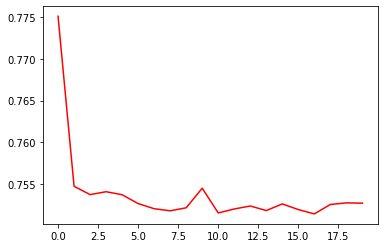

In [16]:
import matplotlib.pyplot as plt
# train
history = model.fit(train_x_std, train_y, epochs=epochs, batch_size=batch_size, class_weight=class_weight)

# evaluate accuracy
train_acc = model.evaluate(train_x_std, train_y, batch_size=32)[1]
test_acc = model.evaluate(test_x_std, test_y, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

### 2 hidden layers
多一層也沒有好多好

In [17]:
model = models.Sequential()

#hidden layer
model.add(layers.Dense(input_dim = 5, units = hidden_units, activation=activation))

#hidden layer2
model.add(layers.Dense(input_dim = hidden_units, units = hidden_units*2, activation=activation))

#output layer
model.add(layers.Dense(input_dim = hidden_units*2, units = 1, activation='sigmoid'))

#loss function and optimizer
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

Epoch 1/20
2264/2264 [==============================] - 0s 41us/step - loss: 0.7746 - accuracy: 0.5415
Epoch 2/20
2264/2264 [==============================] - 0s 8us/step - loss: 0.7517 - accuracy: 0.5459
Epoch 3/20
2264/2264 [==============================] - 0s 8us/step - loss: 0.7552 - accuracy: 0.5464
Epoch 4/20
2264/2264 [==============================] - 0s 8us/step - loss: 0.7515 - accuracy: 0.5459
Epoch 5/20
2264/2264 [==============================] - 0s 8us/step - loss: 0.7516 - accuracy: 0.5459
Epoch 6/20
2264/2264 [==============================] - 0s 8us/step - loss: 0.7520 - accuracy: 0.5459
Epoch 7/20
2264/2264 [==============================] - 0s 8us/step - loss: 0.7529 - accuracy: 0.5459
Epoch 8/20
2264/2264 [==============================] - 0s 8us/step - loss: 0.7523 - accuracy: 0.5459
Epoch 9/20
2264/2264 [==============================] - 0s 8us/step - loss: 0.7516 - accuracy: 0.5459
Epoch 10/20
2264/2264 [==============================] - 0s 8us/step - loss: 0.75

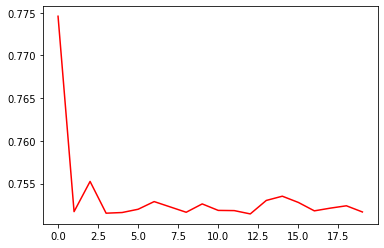

In [18]:
# train
history = model.fit(train_x_std, train_y, epochs=epochs, batch_size=batch_size, class_weight=class_weight)

# evaluate accuracy
train_acc = model.evaluate(train_x_std, train_y, batch_size=32)[1]
test_acc = model.evaluate(test_x_std, test_y, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

## SVM

用預設的參數似乎沒有很高

In [19]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(train_x_std, train_y)

result = svm.predict(test_x_std)
acc_rate = accuracy_score(test_y, result)
print(acc_rate)

0.5198412698412699


試著只用 open price 跟 close price 預測，竟然完全一樣


In [20]:

train_xs = train_x_std[:, 0:2]
test_xs = test_x_std[:, 0:2]


svm = SVC()
svm.fit(train_xs, train_y)

result = svm.predict(test_xs)
acc_rate = accuracy_score(test_y, result)
print(acc_rate)


0.5198412698412699


換個 kernel 還是一樣

In [21]:
svm = SVC(kernel = 'linear')
svm.fit(train_x_std, train_y)

result = svm.predict(test_x_std)
acc_rate = accuracy_score(test_y, result)
print(acc_rate)


0.5198412698412699


調整 penalty 結果準確率來到了 60 %

In [22]:
svm = SVC(C = 6)
svm.fit(train_x_std, train_y)

result = svm.predict(test_x_std)
acc_rate = accuracy_score(test_y, result)
print(acc_rate)

0.6031746031746031


## 討論

三個模型不管怎麼調，最佳的準確率三個都沒太高可能以上的參數不足以預估股票的帳跌，可能需要更多的 background knowledge 支撐，而且隨機性太大誰知道哪天出現個地名肺炎(已經出現)讓股市大跌。而且股票是連續時序性的變化，可能要多考慮幾天。

## 套用至不同 dataset
依照剛剛的討論，不如為每天加入前幾天的資料作依據做為新的 data set 試試看呀!

In [23]:
train_data['open1'] = 0
train_data['close1'] = 0
train_data['volume1'] = 0

train_data['open2'] = 0
train_data['close2'] = 0
train_data['volume2'] = 0

train_data['open3'] = 0
train_data['close3'] = 0
train_data['volume3'] = 0

train_data['open4'] = 0
train_data['close4'] = 0
train_data['volume4'] = 0


for i in range(4, train_data.shape[0]):
  train_data['open1'][i] = train_data['Open Price'][i-4]
  train_data['close1'][i] = train_data['Close Price'][i-4]
  train_data['volume1'][i] = train_data['Volume'][i-4]
  

  train_data['open2'][i] = train_data['Open Price'][i-3]
  train_data['close2'][i] = train_data['Close Price'][i-3]
  train_data['volume2'][i] = train_data['Volume'][i-3]
  
  train_data['open3'][i] = train_data['Open Price'][i-2]
  train_data['close3'][i] = train_data['Close Price'][i-2]
  train_data['volume3'][i] = train_data['Volume'][i-2]
  
  train_data['open4'][i] = train_data['Open Price'][i-1]
  train_data['close4'][i] = train_data['Close Price'][i-1]
  train_data['volume4'][i] = train_data['Volume'][i-1]
  

train_data.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,movement,open1,close1,volume1,open2,close2,volume2,open3,close3,volume3,open4,close4,volume4
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080,0,0,0,0,0,0,0,0,0,0,0,0,0
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016,1,0,0,0,0,0,0,0,0,0,0,0,0
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032,0,0,0,0,0,0,0,0,0,0,0,0,0
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032,1,0,0,0,0,0,0,0,0,0,0,0,0
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952,0,902,931,4048270080,929,927,5413910016,931,934,5392620032,927,906,4704940032


In [24]:
test_data['open1'] = 0
test_data['close1'] = 0
test_data['volume1'] = 0

test_data['open2'] = 0
test_data['close2'] = 0
test_data['volume2'] = 0

test_data['open3'] = 0
test_data['close3'] = 0
test_data['volume3'] = 0

test_data['open4'] = 0
test_data['close4'] = 0
test_data['volume4'] = 0


for i in range(4, test_data.shape[0]):
  test_data['open1'][i] = test_data['Open Price'][i-4]
  test_data['close1'][i] = test_data['Close Price'][i-4]
  test_data['volume1'][i] = test_data['Volume'][i-4]
  
  test_data['open2'][i] = test_data['Open Price'][i-3]
  test_data['close2'][i] = test_data['Close Price'][i-3]
  test_data['volume2'][i] = test_data['Volume'][i-3]
  
  test_data['open3'][i] = test_data['Open Price'][i-2]
  test_data['close3'][i] = test_data['Close Price'][i-2]
  test_data['volume3'][i] = test_data['Volume'][i-2]
  
  test_data['open4'][i] = test_data['Open Price'][i-1]
  test_data['close4'][i] = test_data['Close Price'][i-1]
  test_data['volume4'][i] = test_data['Volume'][i-1]
  

In [25]:
#train set x
train_x = train_data[['Open Price', 'Close Price', 'High Price', 'Low Price', 'Volume','open1','close1','volume1','open2','close2','volume2','open3','close3','volume3','open4','close4','volume4']]
#train set y
train_y = train_data[['movement']]

#test set x
test_x = test_data[['Open Price', 'Close Price', 'High Price', 'Low Price', 'Volume','open1','close1','volume1','open2','close2','volume2','open3','close3','volume3','open4','close4','volume4']]
test_y = test_data[['movement']]

### Preprocessing
standardization

In [26]:

scaler = StandardScaler().fit(train_x)

train_x = scaler.transform(train_x)

scaler = StandardScaler().fit(test_x)
test_x = scaler.transform(test_x)

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x, train_y)

result = LR.predict(train_x)
acc_rate = accuracy_score(train_y, result)
print(acc_rate)

0.5485865724381626


### NN

In [28]:

hidden_units = 10
activation = 'relu'
l2 = 0.001
learning_rate = 0.1
epochs = 20
batch_size = 100

In [29]:
model = models.Sequential()

#hidden layer
model.add(layers.Dense(input_dim = 17, units = hidden_units, activation=activation))

#hidden layer2
model.add(layers.Dense(input_dim = hidden_units, units = hidden_units*2, activation=activation))

#output layer
model.add(layers.Dense(input_dim = hidden_units*2, units = 1, activation='sigmoid'))

#loss function and optimizer
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

Epoch 1/20
2264/2264 [==============================] - 0s 44us/step - loss: 0.7977 - accuracy: 0.5225
Epoch 2/20
2264/2264 [==============================] - 0s 9us/step - loss: 0.7532 - accuracy: 0.5455
Epoch 3/20
2264/2264 [==============================] - 0s 12us/step - loss: 0.7516 - accuracy: 0.5459
Epoch 4/20
2264/2264 [==============================] - 0s 11us/step - loss: 0.7519 - accuracy: 0.5459
Epoch 5/20
2264/2264 [==============================] - 0s 11us/step - loss: 0.7529 - accuracy: 0.5459
Epoch 6/20
2264/2264 [==============================] - 0s 9us/step - loss: 0.7527 - accuracy: 0.5459
Epoch 7/20
2264/2264 [==============================] - 0s 9us/step - loss: 0.7528 - accuracy: 0.5459
Epoch 8/20
2264/2264 [==============================] - 0s 9us/step - loss: 0.7530 - accuracy: 0.5459
Epoch 9/20
2264/2264 [==============================] - 0s 8us/step - loss: 0.7514 - accuracy: 0.5459
Epoch 10/20
2264/2264 [==============================] - 0s 10us/step - loss: 

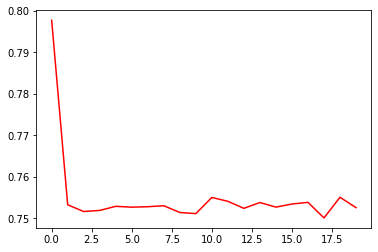

In [30]:
history = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, class_weight=class_weight)

# evaluate accuracy
train_acc = model.evaluate(train_x, train_y, batch_size=32)[1]
test_acc = model.evaluate(test_x, test_y, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

### SVM

In [31]:
svm = SVC(C = 12)
svm.fit(train_x, train_y)

result = svm.predict(test_x)
acc_rate = accuracy_score(test_y, result)
print(acc_rate)

0.5158730158730159


## 討論
結果加入更多天對 LR 跟 NN 都沒有太大的差別本來怕會 overfitting 但好像也還好反而 SVM 變得怎樣調準確率都不高了QQ